In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle
import json

In [48]:
df = pd.read_csv('medical_insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


<AxesSubplot:xlabel='charges', ylabel='Density'>

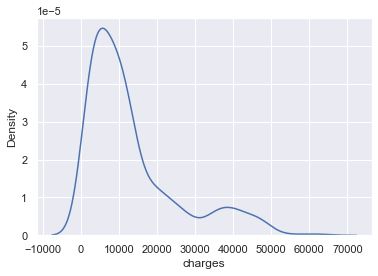

In [8]:
sns.kdeplot(df['charges'])

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [13]:
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [17]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [18]:
df['smoker'] = df['smoker'].replace({'no': 1, 'yes': 0})

In [20]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [22]:
df = pd.get_dummies(df,columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [24]:
x = df.drop(['charges'],axis=1)
y = df['charges']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=365)

In [28]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
989,24,0,20.520,0,0,1,0,0,0
155,44,1,39.520,0,1,0,1,0,0
440,31,0,32.680,1,1,0,1,0,0
531,62,0,31.730,0,1,1,0,0,0
616,56,0,28.595,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
261,20,0,26.840,1,0,0,0,1,0
428,21,0,16.815,1,1,1,0,0,0
859,57,1,28.100,0,1,0,0,0,1
801,64,0,35.970,0,1,0,0,1,0


In [29]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1236,63,0,21.660,0,1,1,0,0,0
1060,24,1,32.010,0,1,0,0,1,0
636,19,0,24.510,1,1,0,1,0,0
347,46,1,33.345,1,1,1,0,0,0
259,19,1,31.920,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1201,46,1,40.375,2,1,0,1,0,0
55,58,1,36.955,2,0,0,1,0,0
1030,46,0,23.655,1,0,0,1,0,0
406,33,0,24.310,0,1,0,0,1,0


In [30]:
model  = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
# Test data evaluation
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE: ",mse)

rmse = np.sqrt(mse)
print('RMSE: ',rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE: ",mae)

r_squared = r2_score(y_test,y_pred)
print("R2: ", r_squared)

MSE:  36020374.99799589
RMSE:  6001.697676324249
MAE:  4065.2262155934814
R2:  0.7389999216387217


In [36]:
# Train data evaluation
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r_square = r2_score(y_train, y_pred_train)
print('R_Squared value:',r_square)

MSE : 36702030.2460083
RMSE : 6058.220055924702
MAE : 4153.826781507145
R_Squared value: 0.7531468626258548


# Testing on single row

In [38]:
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,0,0,0,1
1,18,1,33.770,1,1,0,0,1,0
2,28,1,33.000,3,1,0,0,1,0
3,33,1,22.705,0,1,0,1,0,0
4,32,1,28.880,0,1,0,1,0,0


In [39]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [40]:
age = 67
sex = 'male'
bmi = 30
children = 3
smoker = 'no'
region = 'southeast'

In [41]:
# For label encoding data columns

project_data = {'sex':{'male': 1, 'female': 0},
               'smoker':{'no': 1, 'yes': 0},
               'columns':list(x.columns)}

In [42]:
region = 'region_' + region
region_index = np.where(x.columns==region)[0][0]
region_index

7

In [45]:
test_array = np.zeros(x.shape[1],dtype=int)

test_array[0] = age
test_array[1] = project_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = project_data['smoker'][smoker]
test_array[region_index] = 1
test_array

array([67,  1, 30,  3,  1,  0,  0,  1,  0])

In [46]:
# model  predictions

In [47]:
model.predict([test_array])

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15671.74065129])

In [49]:
# Dump data

In [50]:
with open('Linear_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [51]:
with open('Project_data.json', 'w') as f:
    json.dump(project_data,f)